### matplotlib 차트 유형

1. histogram    : 
2. bar plot     :
3. scatter plot : 
4. line plot    : 
5. box plot     : 연속형 값의 사분위, 이상치 파악
6. pie chart    : 전체 범위 중의 비율

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font)

---

### Histogram

- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터포인트의 개수 (합)

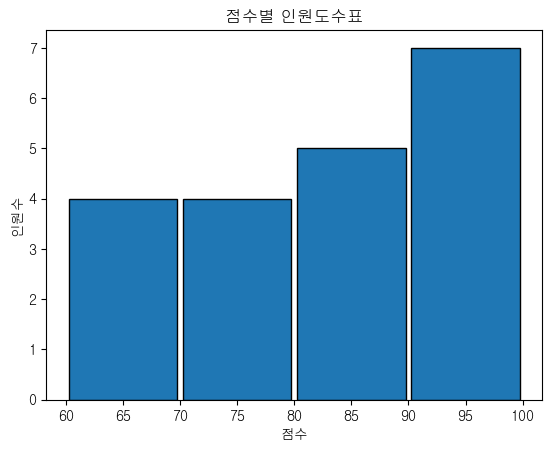

In [9]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]
# print(len(scores))

bins = [60, 70, 80, 90, 100]
plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.95)
# bins : 나뉠 구간의 개수 (기본값 = 10)
# edgecolor : 히스토그램 막대의 경계선 색상
# rwidth : 0~1 사이의 값으로 상대적 너비 조정


plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

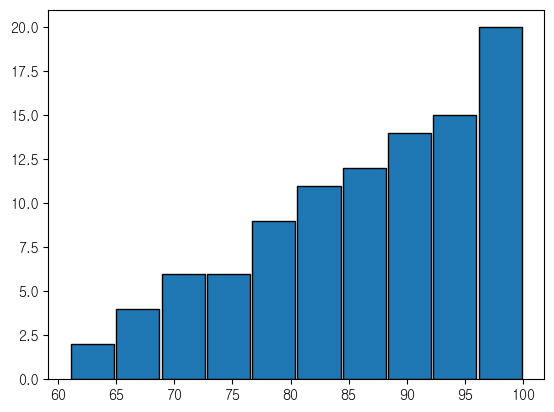

In [11]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()

In [12]:
df = pd.read_csv('./data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


In [15]:
df.describe()

,BTC,ETH,LTC
count,2385.000000,2061.000000,2385.000000
mean,0.280359,0.538739,0.315764
std,3.887338,6.471972,5.783455
min,-37.169539,-72.824950,-40.224814
25%,-1.209796,-2.257161,-1.922825
50%,0.203326,0.043409,-0.022066
75%,1.804233,2.912284,2.078286
max,25.247169,50.732307,66.765321


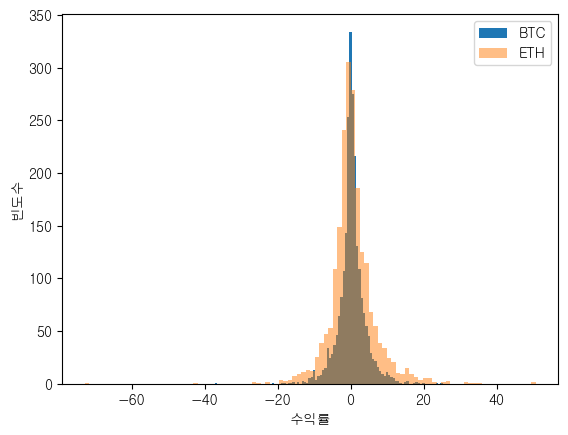

In [20]:
plt.hist(df['BTC'], bins=100, label='BTC')
plt.hist(df['ETH'], bins=100, label='ETH', alpha=.5)        # alpha : 투명도
plt.legend()

plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.show()

---

### Bar Plot

- 막대 차트
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터(총합, 평균)

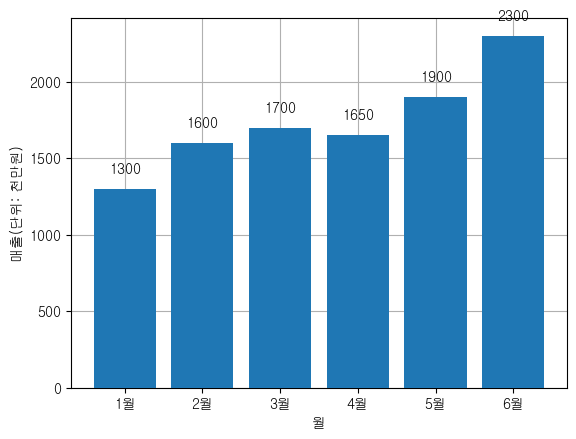

In [ ]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months': ['1월', '2월', '3월', '4월', '5월', '6월'],
    'sales': [1300, 1600, 1700, 1650, 1900, 2300]
})

# zoder : z축 깊이 설정 (값이 클수록 앞으로 나옴)
plt.bar(df['months'], df['sales'], zorder=10)

for i, val in enumerate(df['sales']):
    # x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, val + 100, str(val), ha='center')


plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=1)
plt.show()

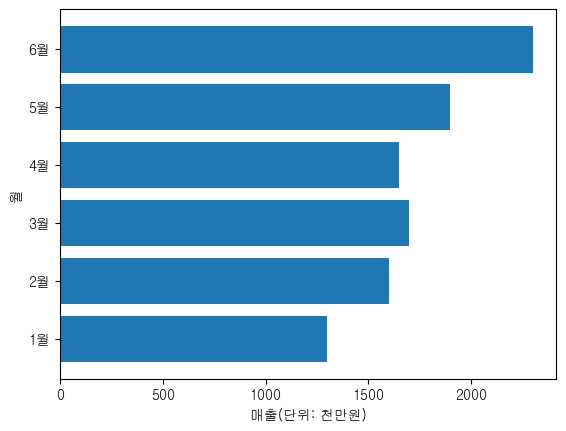

In [30]:
# 수평 막대그래프
# - x축 : 연속형
# - y축 : 범주형

plt.barh(df['months'], df['sales'])

plt.ylabel('월')
plt.xlabel('매출(단위: 천만원)')

plt.show()

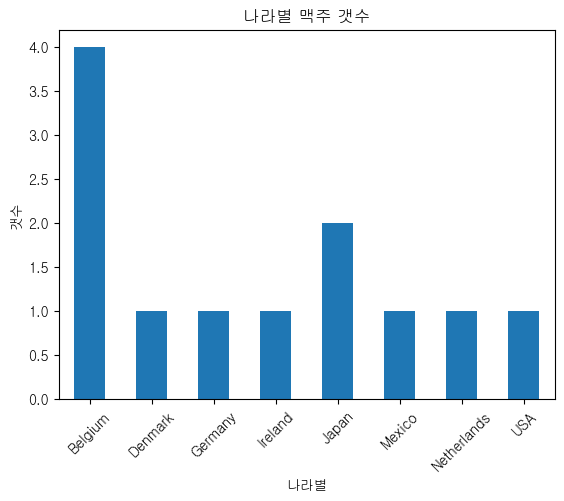

In [49]:
# 나라별 맥주의 개수 시각화
beers_df = pd.read_csv('./data/beers.csv')

beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
# print(beer_df_groupby)


# bar chart
#plt.bar(beer_df_groupby.index, beer_df_groupby)

# histogram
# plt.hist(beers_df['country'], bins=beers_df['country'].nunique(), rwidth=.9)

# 다른 방식으로 출력
beer_df_groupby.plot(kind='bar')


plt.xticks(rotation=45)

plt.xlabel('나라별')
plt.ylabel('갯수')
plt.title('나라별 맥주 갯수')

plt.show()

---

### Line Plot

- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터
    - y축 : 연속형 데이터

In [51]:
# 주가 추이
df = pd.DataFrame({
    'Date': pd.date_range(start='2025-01-01', periods=14, freq='D'),
    'APPL': np.random.randint(100, 150, 14),
    'MSFT': np.random.randint(100, 150, 14)
})

df

,Date,APPL,MSFT
0,2025-01-01,128,147
1,2025-01-02,133,112
2,2025-01-03,104,102
3,2025-01-04,109,109
4,2025-01-05,135,114
5,2025-01-06,121,122
6,2025-01-07,135,146
7,2025-01-08,122,116
8,2025-01-09,113,131
9,2025-01-10,146,143


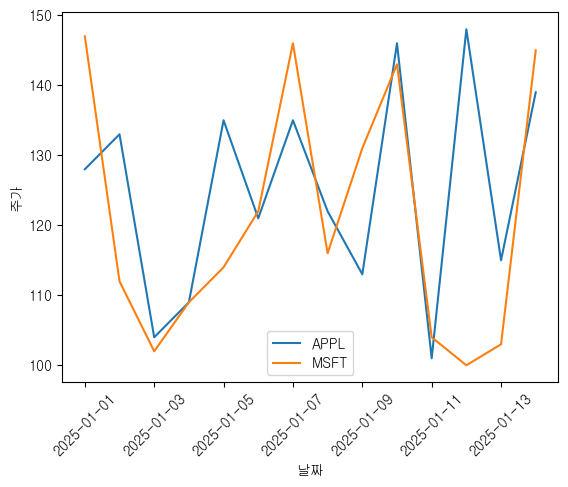

In [55]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xlabel('날짜')
plt.ylabel('주가')
plt.xticks(rotation=45)
plt.legend()
plt.show()

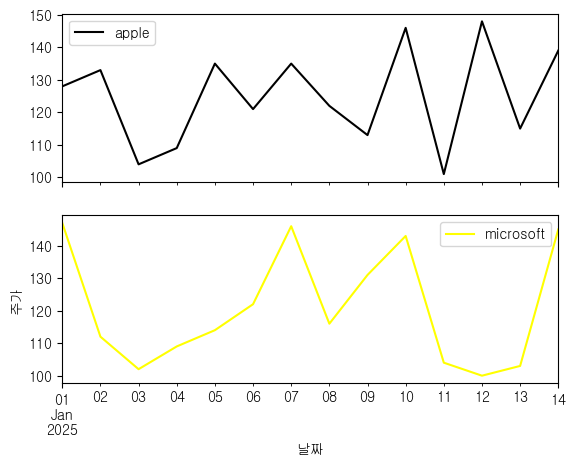

In [ ]:
df.plot(
    x= 'Date',
    y= ['APPL', 'MSFT'],
    color= ['black', 'yellow'],
    label= ['apple', 'microsoft'],      # legend 설정하지 않아도 만들어짐
    subplots=True                       # subplot 형태로 그림
)

plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()

In [64]:
# 코인 주가 추이
crypto_df = pd.read_csv('./data/crypto_daily_prices.csv')
crypto_df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

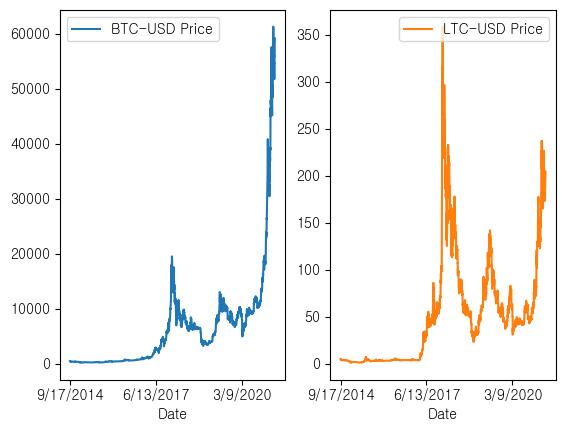

In [66]:
crypto_df.plot(
    x='Date',
    y=['BTC-USD Price', 'LTC-USD Price'],
    subplots=True,
    layout=(1, 2)
)

### Scatter Plot

- 두 축의 변수 관계를 시각화
- 두 변수 간 상관관계, 클러스터링, 이상치 파악에 도움

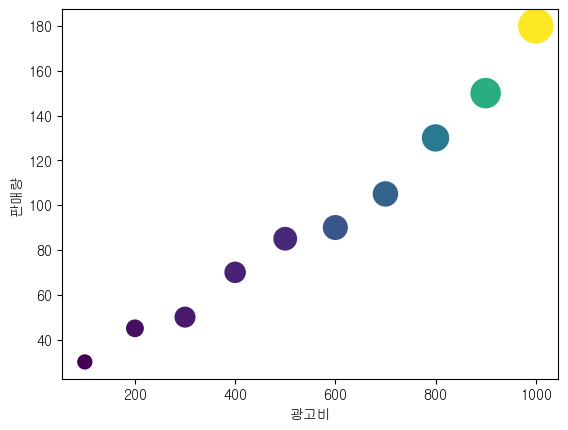

In [70]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# x축, y축, s=점의 크기, c=점의 색상(컬러 값으로 연속 데이터 표현 가능)
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'])

plt.xlabel('광고비')
plt.ylabel('판매량')
plt.show()